# **1.** **Dataset**

**Dataset:** "default of credit card clients" Dataset from UCI Machine Learning Repository

**Data Set Information:**
This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.

From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.

Because the real probability of default is unknown, this study presented the novel of Sorting Smoothing Methods to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one.

Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.

**Attribute Information:**
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable.

This study reviewed the literature and used the following 23 variables as explanatory variables:
* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit
* X2: Gender (1 = male; 2 = female).
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* X4: Marital status (1 = married; 2 = single; 3 = others).
* X5: Age (year).
* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September 2005) as follows: X6 = the repayment status in September 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .; X23 = amount paid in April, 2005.


## **1.1** Loading Data

In [ ]:
# Import Libraries
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DefaultCreditCardClients.xls to DefaultCreditCardClients.xls


In [ ]:
# Load DefaultCreditCardClients.xls
import pandas as pd
file_path = 'DefaultCreditCardClients.xls'
data = pd.read_excel(file_path)
display(data.head())

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
data1 = pd.read_excel(file_path, skiprows=1)

data1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## **1.2** Inspecting Data


In [ ]:
# Display some information of data1 dataset
display(data1.head())
display(data1.tail())
display(data1.info())

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

None

In [ ]:
# Get the shape(Rows, Columns) of the data1 dataset
print("Shape : ", data1.shape)

Shape :  (30000, 25)


In [ ]:
# Understand some important information from the data1 dataset
data1.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# Duplicated data
data1[data1.duplicated() == True]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


 ## **1.3** Missing  Values

In [ ]:
data1.isnull().values.any()

False

# **2.** **Data Visualization and Exploration**

In [ ]:
grouped_payment_status = data1.groupby('default payment next month')['default payment next month'].count()
# Count of '1' (Yes) and '0' (No)
yes_count = grouped_payment_status[1]
no_count = grouped_payment_status[0]

print("Default payment next month:", yes_count)
print ("Not default payment next month:", no_count)

Default payment next month: 6636
Not default payment next month: 23364


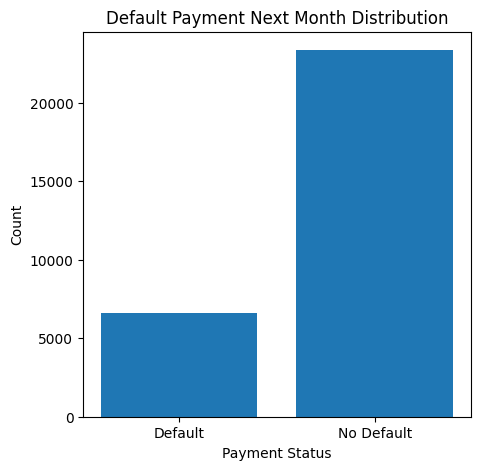

In [ ]:
# Prepare data
labels = ["Default", "No Default"]
values = [yes_count, no_count]

# Create the bar chart
plt.bar(labels, values)

# Add labels and title
plt.xlabel("Payment Status")
plt.ylabel("Count")
plt.title("Default Payment Next Month Distribution")

# Display the plot
plt.show()

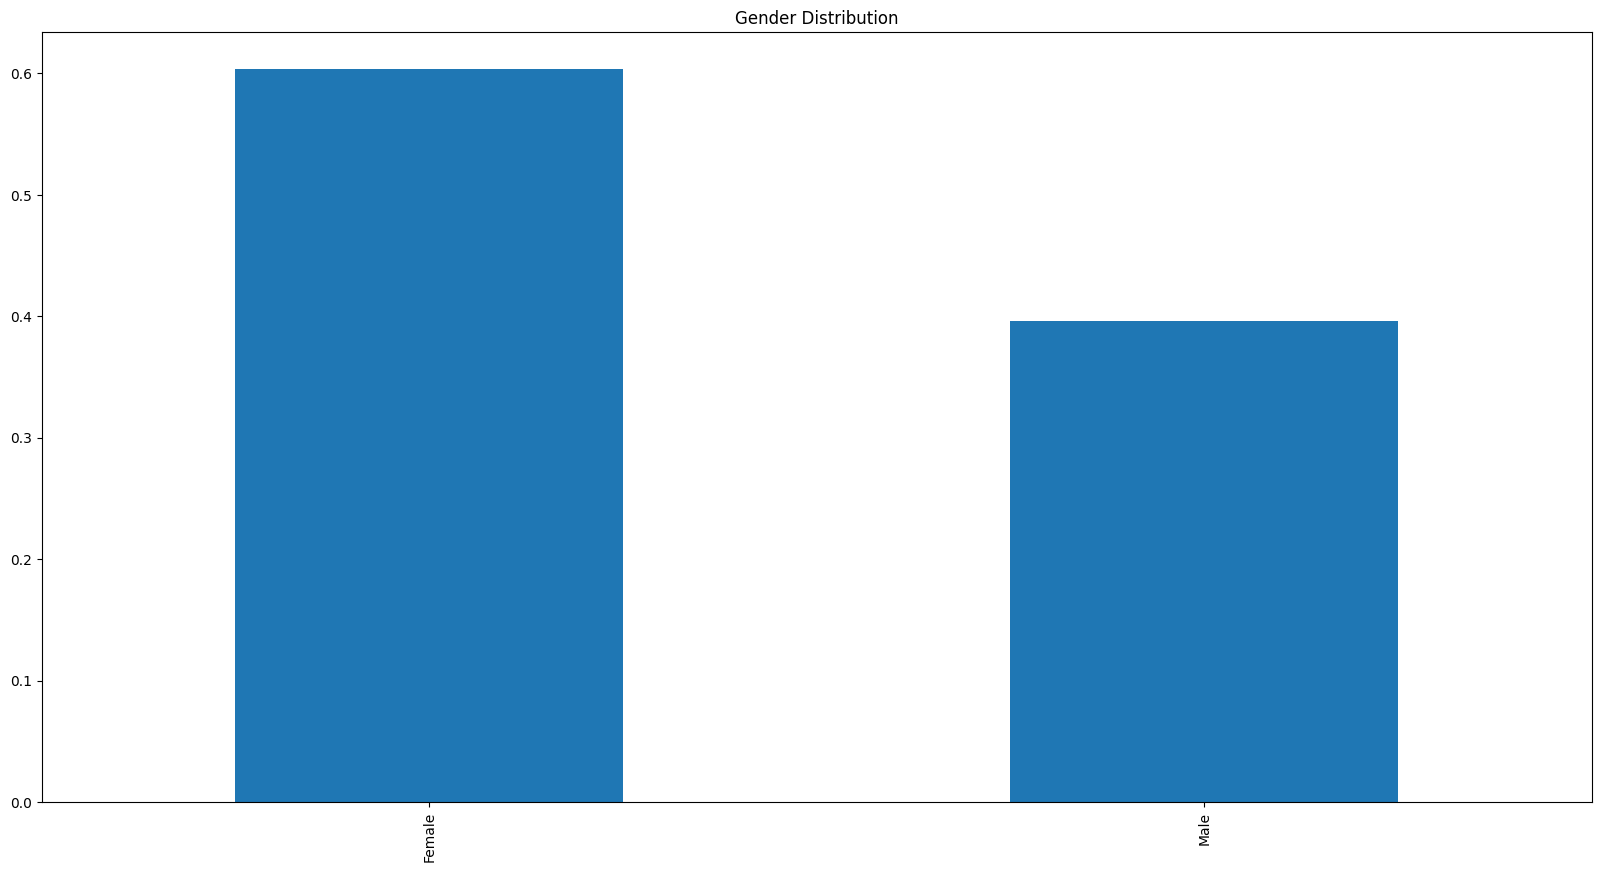

In [ ]:
data1['SEX'].map({1: 'Male', 2: 'Female'}).value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender Distribution')
plt.show()

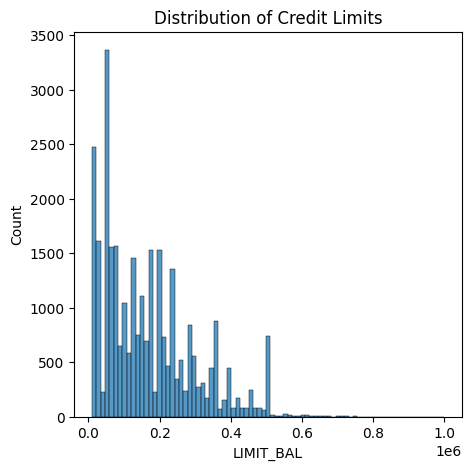

In [ ]:
# Plot the distribution of credit limits
sns.histplot(data1['LIMIT_BAL'])
plt.title('Distribution of Credit Limits')
plt.show()

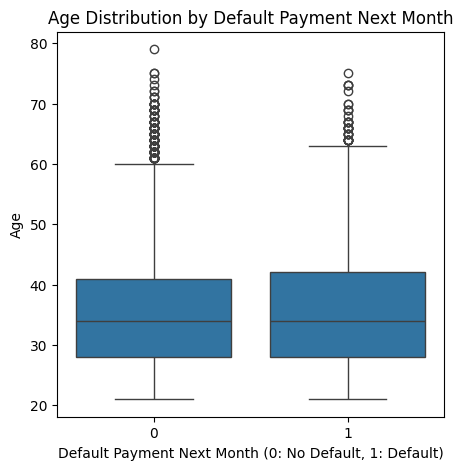

In [ ]:
# Create the boxplot
sns.boxplot(x='default payment next month', y='AGE', data=data1)
plt.title('Age Distribution by Default Payment Next Month')
plt.xlabel('Default Payment Next Month (0: No Default, 1: Default)')
plt.ylabel('Age')
plt.show()

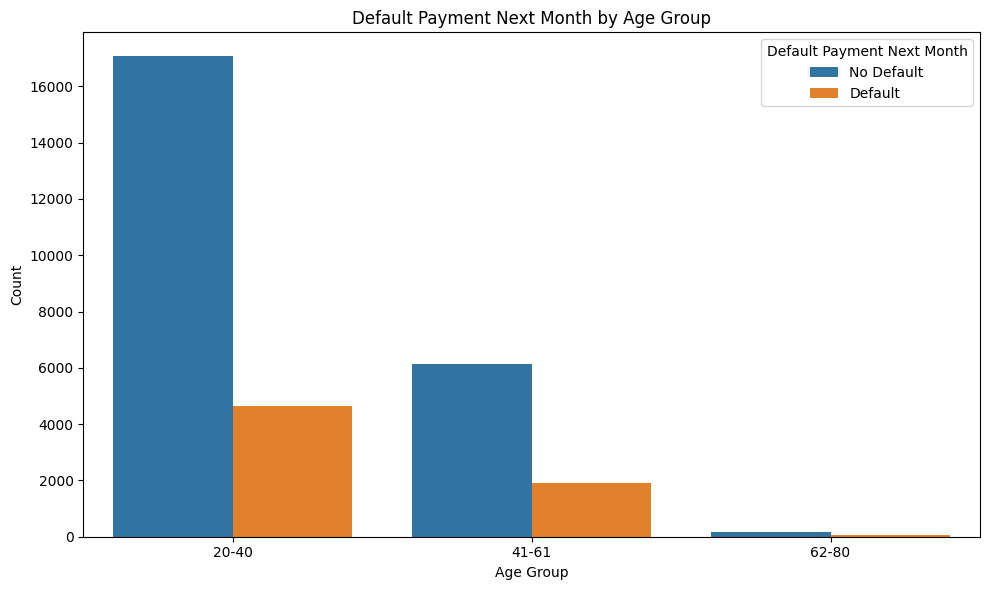

In [ ]:
# Define the age bins and labels for the categorization
age_bins = [20, 40, 61, 80]
age_labels = ['20-40', '41-61', '62-80']

# Create a new column in the dataframe for the age group
data1['age_group'] = pd.cut(data1['AGE'], bins=age_bins, labels=age_labels, include_lowest=True)

# Visualize the distribution of defaults by age group
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='default payment next month', data=data1)
plt.title('Default Payment Next Month by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Default Payment Next Month', labels=['No Default', 'Default'])
plt.tight_layout()
plt.show()

In [ ]:
print(data1.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'age_group'],
      dtype='object')


In [ ]:
# prompt: drop data1['age_group']

data1 = data1.drop('age_group', axis=1)


In [ ]:
print(data1.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


# **3.** **Data Preprocessing**

## **3.1** One-hot encode

In [ ]:
# One-hot encode the categorical variables
data2 = pd.get_dummies(data1, columns=['SEX', 'EDUCATION', 'MARRIAGE',
                                       'PAY_0', 'PAY_2', 'PAY_3',
                                       'PAY_4', 'PAY_5', 'PAY_6'])

In [ ]:
display(data2.head())

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,20000,24,3913,3102,689,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,120000,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,34,29239,14027,13559,14331,14948,15549,1518,...,0,0,1,0,0,0,0,0,0,0
3,4,50000,37,46990,48233,49291,28314,28959,29547,2000,...,0,0,1,0,0,0,0,0,0,0
4,5,50000,57,8617,5670,35835,20940,19146,19131,2000,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
display(data2.columns)

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'SEX_1', 'SEX_2', 'EDUCATION_0',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'PAY_0_-2', 'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2',
       'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8',
       'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3',
       'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-2',
       'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4',
       'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-2', 'PAY_4_-1',
       'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5',
       'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-2', 'PAY_5_-1', '

## **3.2** Drop Unnecessary Columns

In [ ]:
# Drop specified columns(ID, PAY_0_0, PAY_2_0, PAY_3_0, PAY_4_0, PAY_5_0, PAY_6_0)from data2
data3 = data2.drop(['ID','PAY_0_-2', 'PAY_0_0', 'PAY_2_-2','PAY_2_0', 'PAY_3_-2','PAY_3_0',
                    'PAY_4_-2', 'PAY_4_0', 'PAY_5_-2','PAY_5_0',
                   'PAY_6_-2', 'PAY_6_0'], axis=1)

In [ ]:
data3

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,24,3913,3102,689,0,0,0,0,689,...,0,0,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,0,0,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,0,0,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,188948,192815,208365,88004,31237,15980,8500,20000,...,0,0,0,0,0,0,0,0,0,0
29996,150000,43,1683,1828,3502,8979,5190,0,1837,3526,...,0,0,0,0,0,0,0,0,0,0
29997,30000,37,3565,3356,2758,20878,20582,19357,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,80000,41,-1645,78379,76304,52774,11855,48944,85900,3409,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
data3.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,...,0.001933,0.000033,0.191333,0.092200,0.006133,0.001633,0.000433,0.000633,0.001533,0.000067
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,...,0.043928,0.005774,0.393357,0.289313,0.078076,0.040382,0.020812,0.025159,0.039128,0.008165
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **3.3** Drop Rows With Negative Values

In [ ]:
# Drop rows where any value is negative
data3_cleaned = data3[(data3 >= 0).all(axis=1)]

data3_cleaned

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,24,3913,3102,689,0,0,0,0,689,...,0,0,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,0,0,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,0,0,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,80000,34,72557,77708,79384,77519,82607,81158,7000,3500,...,0,0,0,1,0,0,0,0,0,0
29995,220000,39,188948,192815,208365,88004,31237,15980,8500,20000,...,0,0,0,0,0,0,0,0,0,0
29996,150000,43,1683,1828,3502,8979,5190,0,1837,3526,...,0,0,0,0,0,0,0,0,0,0
29997,30000,37,3565,3356,2758,20878,20582,19357,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data3_cleaned.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
count,28070.000000,28070.000000,28070.000000,28070.000000,28070.000000,28070.000000,28070.000000,28070.000000,28070.000000,2.807000e+04,...,28070.000000,28070.000000,28070.000000,28070.000000,28070.000000,28070.000000,28070.000000,28070.000000,28070.000000,28070.000000
mean,164443.522622,35.450374,53623.147987,51601.967866,49250.226470,45519.161454,42380.703741,40891.205593,5681.799608,5.763613e+03,...,0.002066,0.000036,0.180691,0.096651,0.006448,0.001746,0.000463,0.000677,0.001639,0.000071
std,128985.392370,9.242283,74554.826995,72144.853055,69497.193552,65336.236578,61724.863516,60368.671733,16309.362434,1.965531e+04,...,0.045410,0.005969,0.384769,0.295488,0.080043,0.041745,0.021516,0.026009,0.040449,0.008441
min,10000.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,4803.250000,4242.750000,3968.250000,3381.250000,2622.000000,1966.750000,1067.000000,1.000000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,25413.500000,24433.500000,22628.500000,20235.000000,19296.000000,18720.000000,2200.000000,2.085500e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,230000.000000,41.000000,70565.750000,68002.500000,63947.500000,58230.250000,53031.750000,51082.000000,5042.000000,5.000000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,693131.000000,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **3.3** Save Clean Data

In [ ]:
# Export data to a CSV file
data3_cleaned.to_csv('CleanedDefaultCredittCardClients.csv', index=False)

## **3.5** Split Dataset into Outcome Variable(Y) and Predictor Variables(X)

In [ ]:
# Split the dataset into features and target variable
X = data3_cleaned.drop('default payment next month', axis=1)
y = data3_cleaned['default payment next month']

In [ ]:
X

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,24,3913,3102,689,0,0,0,0,689,...,0,0,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,0,0,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,0,0,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,188948,192815,208365,88004,31237,15980,8500,20000,...,0,0,0,0,0,0,0,0,0,0
29996,150000,43,1683,1828,3502,8979,5190,0,1837,3526,...,0,0,0,0,0,0,0,0,0,0
29997,30000,37,3565,3356,2758,20878,20582,19357,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,80000,41,-1645,78379,76304,52774,11855,48944,85900,3409,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Understand some important information from the data1 dataset
X.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,...,0.001933,0.000033,0.191333,0.092200,0.006133,0.001633,0.000433,0.000633,0.001533,0.000067
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,...,0.043928,0.005774,0.393357,0.289313,0.078076,0.040382,0.020812,0.025159,0.039128,0.008165
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64

## **3.4** Split Dataset into 80% Trainging Data and 20% Testing Data

In [ ]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **3.5** Data Normalization

In [ ]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **4.** Model Building Part I (Without Singificant Features)

## **4.1** Logistic Regression and Accuracy Score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
model = LogisticRegression(solver = "liblinear")
model.fit(X_train, y_train)
LogisticRegression()

LogisticRegression()

In [ ]:
y_pred1 = model.predict(X_test)
LRAcc = accuracy_score(y_test,y_pred1)
print('Logistic Regression Accuracy: {:.2f}%'.format(LRAcc*100))

Logistic Regression Accuracy: 81.87%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_lr = accuracy_score(y_test, y_pred1)
precision_lr = precision_score(y_test, y_pred1)
recall_lr = recall_score(y_test, y_pred1)
f1_lr = f1_score(y_test, y_pred1)

In [ ]:
print('Logistic Regression Accuracy: {:.2f}%'.format(accuracy_lr * 100))
print('Logistic Regression Precision: {:.2f}%'.format(precision_lr* 100))
print('Logistic Regression Recall: {:.2f}%'.format(recall_lr* 100))
print('Logistic Regression F1-Score: {:.2f}%'.format(f1_lr* 100))

Logistic Regression Accuracy: 81.87%
Logistic Regression Precision: 67.19%
Logistic Regression Recall: 37.67%
Logistic Regression F1-Score: 48.27%


<Axes: >

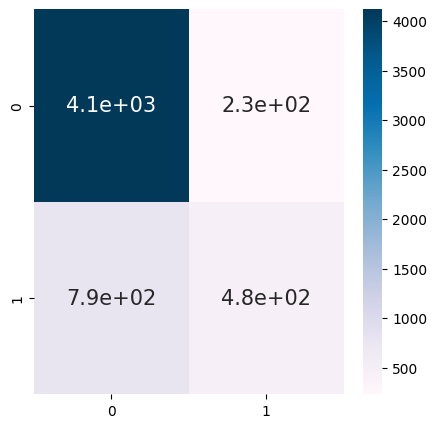

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred1)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

## **4.2** Decision Tree and Accuracy Score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred2 = dt.predict(X_test)

In [ ]:
DTAcc = accuracy_score(y_test, y_pred2)
print('Decision Tree Accuracy: {:.2f}%'.format(DTAcc*100))

Decision Tree Accuracy: 73.16%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_dt = accuracy_score(y_test, y_pred2)
precision_dt = precision_score(y_test, y_pred2)
recall_dt = recall_score(y_test, y_pred2)
f1_dt = f1_score(y_test, y_pred2)

In [ ]:
print('Decision Tree Accuracy: {:.2f}%'.format(accuracy_dt * 100))
print('Decision Tree Precision: {:.2f}%'.format(precision_dt* 100))
print('Decision Tree Recall: {:.2f}%'.format(recall_dt* 100))
print('Decision Tree F1-Score: {:.2f}%'.format(f1_dt* 100))

Decision Tree Accuracy: 73.16%
Decision Tree Precision: 40.62%
Decision Tree Recall: 42.27%
Decision Tree F1-Score: 41.43%


<Axes: >

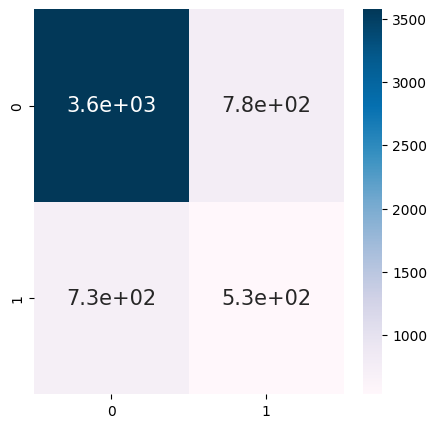

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred2)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

## **4.3** K-Nearest Neighbour (KNN) and Accuracy Score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

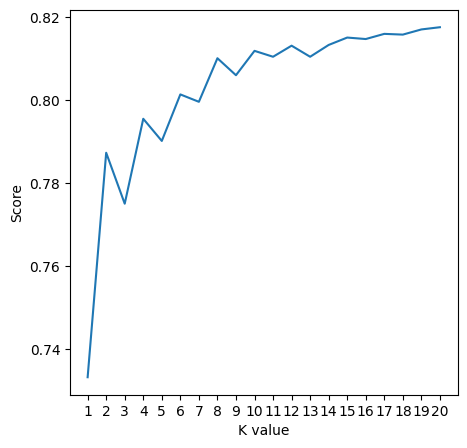

In [ ]:
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

In [ ]:
KNAcc = max(scoreListknn)
print("K-Nearest Neighbour(KNN) Best Accuracy: {:.2f}%".format(KNAcc*100))

K-Nearest Neighbour(KNN) Best Accuracy: 81.76%


In [ ]:
best_k_index = scoreListknn.index(max(scoreListknn))  # Find the index of the maximum accuracy
best_k = best_k_index + 1  # Add 1 because index starts from 0 but k starts from 1

In [ ]:
best_k

20

In [ ]:
# Retrain the KNN classifier with the optimal number of neighbors to get y_pred3
KNclassifier_max = KNeighborsClassifier(n_neighbors=best_k)
KNclassifier_max.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
import joblib
# Saving the KNclassifier_max
joblib.dump(KNclassifier_max, 'KNN_model.joblib')

['KNN_model.joblib']

In [ ]:
# Loading the model
KNclassifier_max = joblib.load('KNN_model.joblib')

In [ ]:
y_pred3 = KNclassifier_max.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
accuracy_knn = accuracy_score(y_test, y_pred3)
precision_knn = precision_score(y_test, y_pred3)
recall_knn = recall_score(y_test, y_pred3)
f1_knn = f1_score(y_test, y_pred3)

In [ ]:
print('K-Nearest Neighbour(KNN) Accuracy: {:.2f}%'.format(accuracy_knn * 100))
print('K-Nearest Neighbour(KNN) Precision: {:.2f}%'.format(precision_knn* 100))
print('K-Nearest Neighbour(KNN) Recall: {:.2f}%'.format(recall_knn* 100))
print('K-Nearest Neighbour(KNN) F1-Score: {:.2f}%'.format(f1_knn* 100))

K-Nearest Neighbour(KNN) Accuracy: 81.76%
K-Nearest Neighbour(KNN) Precision: 67.50%
K-Nearest Neighbour(KNN) Recall: 36.24%
K-Nearest Neighbour(KNN) F1-Score: 47.16%


<Axes: >

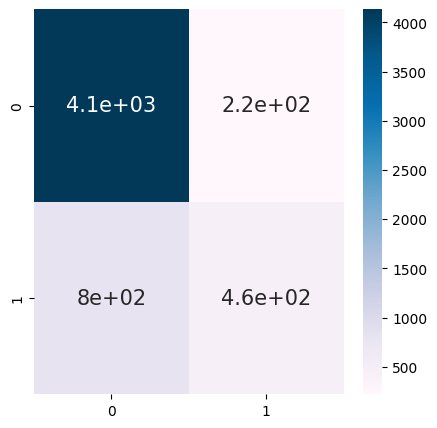

In [ ]:
# Cofusion Matrix
y_pred3 = KNclassifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred3)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

## **4.4** Support Vector Machine (SVM) and Accuracy Score

In [ ]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
print('Support Vector Machine (SVM) Accuracy: {:.2f}%'.format(SVCAcc*100))

Support Vector Machine (SVM) Accuracy: 43.53%


In [ ]:
y_pred4 = SVCclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
accuracy_svc = accuracy_score(y_test, y_pred4)
precision_svc = precision_score(y_test, y_pred4)
recall_svc = recall_score(y_test, y_pred4)
f1_svc = f1_score(y_test, y_pred4)

In [ ]:
print('Support Vector Machine (SVM) Accuracy: {:.2f}%'.format(accuracy_svc * 100))
print('Support Vector Machine (SVM) Precision: {:.2f}%'.format(precision_svc* 100))
print('Support Vector Machine (SVM) Recall: {:.2f}%'.format(recall_svc* 100))
print('Support Vector Machine (SVM) F1-Score: {:.2f}%'.format(f1_svc* 100))

Support Vector Machine (SVM) Accuracy: 43.53%
Support Vector Machine (SVM) Precision: 16.66%
Support Vector Machine (SVM) Recall: 37.83%
Support Vector Machine (SVM) F1-Score: 23.13%


<Axes: >

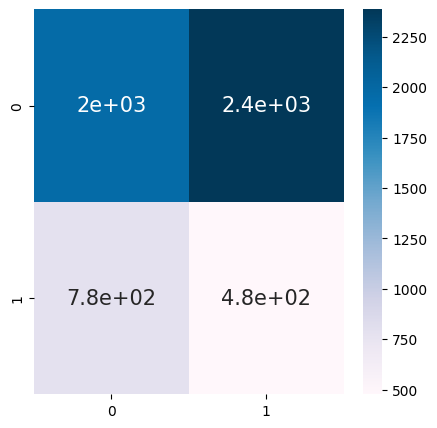

In [ ]:
# Cofusion Matrix
y_pred4 = SVCclassifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred4)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

## **4.5** Random Forest and Accuracy Score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

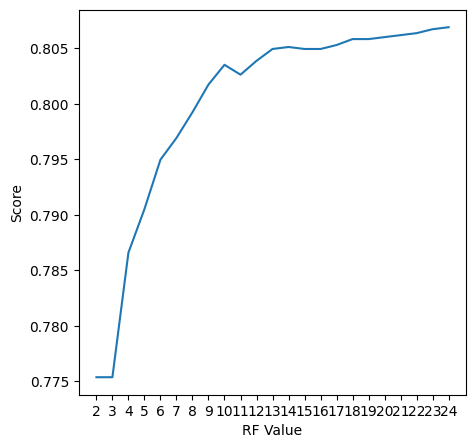

In [ ]:
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()

In [ ]:
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

Random Forest Accuracy:  80.69%


In [ ]:
# Find the index of the maximum accuracy score
best_leaf_nodes_index = scoreListRF.index(max(scoreListRF))
# Add 2 because the loop starts from 2
best_max_leaf_nodes = best_leaf_nodes_index + 2

In [ ]:
# Retrain the Random Forest classifier with the optimal max_leaf_nodes to get y_pred5
RFclassifier_max = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=best_max_leaf_nodes)
RFclassifier_max.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=24, n_estimators=1000, random_state=1)

In [ ]:
import joblib
# Saving the RFclassifier_max
joblib.dump(RFclassifier_max, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [ ]:
# Loading the model
RFclassifier_max = joblib.load('random_forest_model.joblib')

In [ ]:
y_pred5 = RFclassifier_max.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
accuracy_rf = accuracy_score(y_test, y_pred5)
precision_rf = precision_score(y_test, y_pred5)
recall_rf = recall_score(y_test, y_pred5)
f1_rf = f1_score(y_test, y_pred5)

In [ ]:
print('Random Forest Accuracy: {:.2f}%'.format(accuracy_rf * 100))
print('Random Forest Precision: {:.2f}%'.format(precision_rf* 100))
print('Random Forest Recall: {:.2f}%'.format(recall_rf* 100))
print('Random Forest F1-Score: {:.2f}%'.format(f1_rf* 100))

Random Forest Accuracy: 80.69%
Random Forest Precision: 67.59%
Random Forest Recall: 26.96%
Random Forest F1-Score: 38.55%


<Axes: >

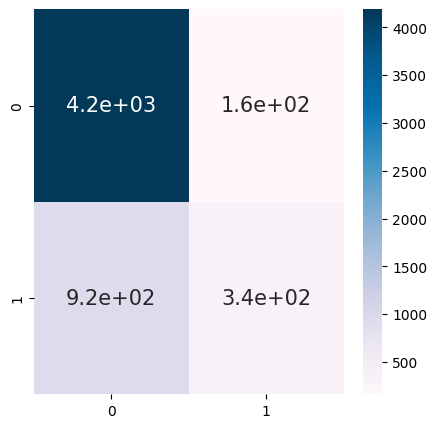

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred5)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

## **4.6** Naïve Bayes

### **4.6.1** Gaussian Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
GNBclassifier = GaussianNB()
GNBclassifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred6 = GNBclassifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred6))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      4353
           1       0.65      0.31      0.42      1261

    accuracy                           0.81      5614
   macro avg       0.74      0.63      0.65      5614
weighted avg       0.79      0.81      0.78      5614

[[1967 2386]
 [ 784  477]]


In [ ]:
from sklearn.metrics import accuracy_score
GNBAcc = accuracy_score(y_pred6,y_test)

In [ ]:
print('Gaussian Naïve Bayes Accuracy: {:.2f}%'.format(GNBAcc*100))

Gaussian Naïve Bayes Accuracy: 80.69%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
accuracy_gnb = accuracy_score(y_test, y_pred6)
precision_gnb = precision_score(y_test, y_pred6)
recall_gnb = recall_score(y_test, y_pred6)
f1_gnb = f1_score(y_test, y_pred6)

In [ ]:
print('Gaussian Naïve Bayes Accuracy: {:.2f}%'.format(accuracy_gnb * 100))
print('Gaussian Naïve Bayes Precision: {:.2f}%'.format(precision_gnb* 100))
print('Gaussian Naïve Bayes Recall: {:.2f}%'.format(recall_gnb* 100))
print('Gaussian Naïve Bayes F1-Score: {:.2f}%'.format(f1_gnb* 100))

Gaussian Naïve Bayes Accuracy: 80.69%
Gaussian Naïve Bayes Precision: 64.53%
Gaussian Naïve Bayes Recall: 31.17%
Gaussian Naïve Bayes F1-Score: 42.03%


### **4.6.2** Bernoulli Naïve Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
BNBclassifier = BernoulliNB()
BNBclassifier.fit(X_train, y_train)

BernoulliNB()

In [ ]:
y_pred7 = BNBclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
BNBAcc = accuracy_score(y_pred7,y_test)
print('Bernoulli Naïve Bayes Accuracy: {:.2f}%'.format(BNBAcc*100))

Bernoulli Naïve Bayes Accuracy: 79.19%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
accuracy_bnb = accuracy_score(y_test, y_pred7)
precision_bnb = precision_score(y_test, y_pred7)
recall_bnb = recall_score(y_test, y_pred7)
f1_bnb = f1_score(y_test, y_pred7)

In [ ]:
print('Bernoulli Naïve Bayes Accuracy: {:.2f}%'.format(accuracy_bnb * 100))
print('Bernoulli Naïve Bayes Precision: {:.2f}%'.format(precision_bnb* 100))
print('Bernoulli Naïve Bayes Recall: {:.2f}%'.format(recall_bnb* 100))
print('Bernoulli Naïve Bayes F1-Score: {:.2f}%'.format(f1_bnb* 100))

Bernoulli Naïve Bayes Accuracy: 79.19%
Bernoulli Naïve Bayes Precision: 54.07%
Bernoulli Naïve Bayes Recall: 49.01%
Bernoulli Naïve Bayes F1-Score: 51.41%


## **4.7** Neural Network

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary of the model architecture
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_acc}, Test loss: {test_loss}')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                5120      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7233 (28.25 KB)
Trainable params: 7233 (28.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
562/562 [==============================] - 3s 4ms/step - loss: 0.5029 - accuracy: 0.7934 - val_loss: 0.4473 - val_accuracy: 0.8130
Epoch 2/10
5

## **4.8** Model Comparison

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour (KNN)',
                                  'Support Vector Machine (SVM)', 'Decision Tree',
                                  'Random Forest', 'Gaussian Naïve Bayes',
                                   'Bernoulli Naïve Bayes','Neural Network'],
                        'Accuracy(%)': [accuracy_lr * 100, accuracy_knn * 100,
                                     accuracy_svc * 100, accuracy_dt * 100,
                                     accuracy_rf * 100, accuracy_gnb * 100,
                                      accuracy_bnb * 100, test_acc * 100]})
compare.sort_values(by='Accuracy(%)', ascending=False)

,Model,Accuracy(%)
0,Logistic Regression,81.866762
7,Neural Network,81.795514
1,K-Nearest Neighbour (KNN),81.759886
4,Random Forest,80.691129
5,Gaussian Naïve Bayes,80.691129
6,Bernoulli Naïve Bayes,79.194870
3,Decision Tree,73.156395
2,Support Vector Machine (SVM),43.534022


# **5.** **Feature Selections**

## Recursive feature elimination with cross-validation

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

X = data3.drop(columns=['default payment next month'])
y = data3['default payment next month']

# Minimum number of features to consider
min_features_to_select = 6

# Logistic Regression classifier
logreg = LogisticRegression()

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5)

# Setup RFECV with the Logistic Regression estimator
rfecv = RFECV(
    estimator=logreg,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)

# Fit the RFECV object
rfecv.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(), min_features_to_select=6, n_jobs=2,
      scoring='accuracy')

In [ ]:
import joblib
# Saving the rfecv
joblib.dump(rfecv, 'rfecv_model.joblib')

['rfecv_model.joblib']

In [ ]:
# Loading the model
rfecv = joblib.load('rfecv_model.joblib')

In [ ]:
# Print the optimal number of features
print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 11


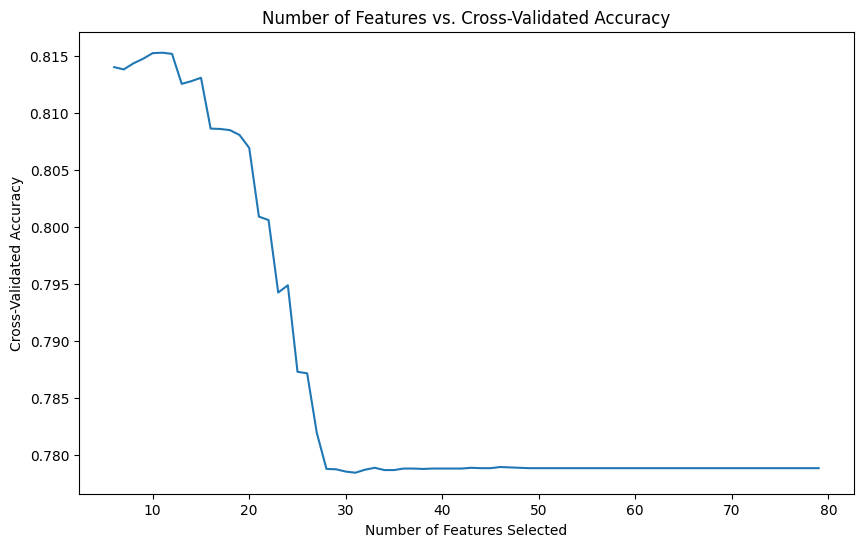

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the number of features versus cross-validated scores
plt.figure(figsize=(10, 6))
plt.title("Number of Features vs. Cross-Validated Accuracy")
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validated Accuracy")
plt.plot(range(min_features_to_select, len(rfecv.cv_results_['mean_test_score']) + min_features_to_select), rfecv.cv_results_['mean_test_score'])
plt.show()

In [ ]:
# Create a DataFrame for Number of Features vs. Cross-Validated Accuracy
num_features = range(min_features_to_select, len(rfecv.cv_results_['mean_test_score']) + min_features_to_select)
cv_accuracy = rfecv.cv_results_['mean_test_score']

data = {'Number of Features': num_features, 'Cross-Validated Accuracy': cv_accuracy}
df = pd.DataFrame(data)

# Print the top 10 rows
print("Top 10 rows of Number of Features vs. Cross-Validated Accuracy:")
print(df.head(10))

Top 10 rows of Number of Features vs. Cross-Validated Accuracy:
   Number of Features  Cross-Validated Accuracy
0                   6                  0.814033
1                   7                  0.813833
2                   8                  0.814367
3                   9                  0.814767
4                  10                  0.815267
5                  11                  0.815300
6                  12                  0.815200
7                  13                  0.812567
8                  14                  0.812800
9                  15                  0.813100


In [ ]:
# Get the selected feature indices
selected_feature_indices = np.where(rfecv.support_)[0]

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

# Print the selected feature names
print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'PAY_0_-1', 'PAY_0_1',
       'PAY_0_2', 'PAY_0_3', 'PAY_2_-1', 'PAY_3_2', 'PAY_5_2', 'PAY_6_2'],
      dtype='object')


# **6.** Model Building Part II (With Significant Features)

## **6.1** New Dataset with Significant Features

In [ ]:
# Selecting the significant features
selected_features = ['EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'PAY_0_-1', 'PAY_0_1',
       'PAY_0_2', 'PAY_0_3', 'PAY_2_-1', 'PAY_3_2', 'PAY_5_2', 'PAY_6_2']

In [ ]:
new_X = X[selected_features]
new_X.head()

,EDUCATION_1,EDUCATION_2,EDUCATION_3,PAY_0_-1,PAY_0_1,PAY_0_2,PAY_0_3,PAY_2_-1,PAY_3_2,PAY_5_2,PAY_6_2
0,0,1,0,0,0,1,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,0


### **6.1.1** Data Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler object
scaler = MinMaxScaler()
# Fit the scaler to new_X
scaler.fit(new_X)
# Transform the data
new_X = scaler.transform(new_X)

### **6.1.2** Split New Dataset

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training (80%) and testing (20%) sets
new_X_train, new_X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=42)

## **6.2** Logistic Regression and Accuracy Score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
new_LRclassifier= LogisticRegression()
new_LRclassifier.fit(new_X_train, y_train)
LogisticRegression()

LogisticRegression()

In [ ]:
new_y_pred1 = new_LRclassifier.predict(new_X_test)

In [ ]:
new_LRAcc = accuracy_score(y_test,new_y_pred1)
print('Logistic Regression Accuracy: {:.2f}%'.format(new_LRAcc*100))

Logistic Regression Accuracy: 81.92%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
new_accuracy_lr = accuracy_score(y_test, new_y_pred1)
new_precision_lr = precision_score(y_test, new_y_pred1)
new_recall_lr = recall_score(y_test, new_y_pred1)
new_f1_lr = f1_score(y_test, new_y_pred1)

In [ ]:
print('Logistic Regression Accuracy: {:.2f}%'.format(new_accuracy_lr * 100))
print('Logistic Regression Precision: {:.2f}%'.format(new_precision_lr* 100))
print('Logistic Regression Recall: {:.2f}%'.format(new_recall_lr* 100))
print('Logistic Regression F1-Score: {:.2f}%'.format(new_f1_lr* 100))

Logistic Regression Accuracy: 81.92%
Logistic Regression Precision: 67.81%
Logistic Regression Recall: 33.05%
Logistic Regression F1-Score: 44.44%


<Axes: >

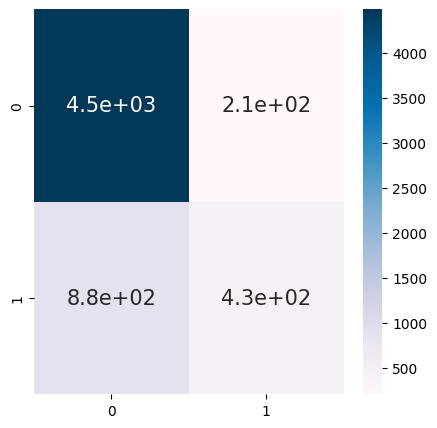

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_test, new_y_pred1)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

## **6.3** Decision Tree and Accuracy Score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
new_DTclassifier = DecisionTreeClassifier()
new_DTclassifier.fit(new_X_train, y_train)
new_y_pred2 = new_DTclassifier.predict(new_X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
new_DTAcc = accuracy_score(y_test, new_y_pred2)
print('Decision Tree Accuracy: {:.2f}%'.format(new_DTAcc*100))

Decision Tree Accuracy: 81.78%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
new_accuracy_dt = accuracy_score(y_test, new_y_pred2)
new_precision_dt = precision_score(y_test, new_y_pred2)
new_recall_dt = recall_score(y_test, new_y_pred2)
new_f1_dt = f1_score(y_test, new_y_pred2)

In [ ]:
print('Decision Tree Accuracy: {:.2f}%'.format(new_accuracy_dt * 100))
print('Decision Tree Precision: {:.2f}%'.format(new_precision_dt* 100))
print('Decision Tree Recall: {:.2f}%'.format(new_recall_dt* 100))
print('Decision Tree F1-Score: {:.2f}%'.format(new_f1_dt* 100))

Decision Tree Accuracy: 81.78%
Decision Tree Precision: 66.22%
Decision Tree Recall: 34.20%
Decision Tree F1-Score: 45.10%


<Axes: >

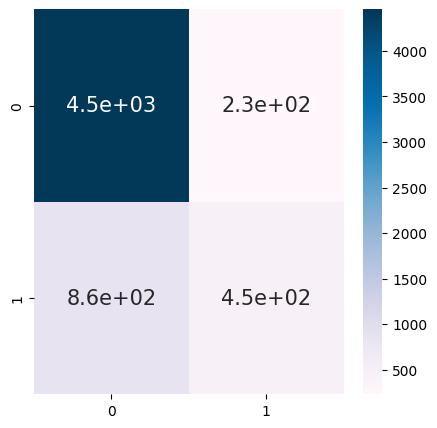

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_test, new_y_pred2)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

## **6.4** K-Nearest Neighbour (KNN) and Accuracy Score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
new_scoreListknn = []
for i in range(1,21):
    new_KNclassifier = KNeighborsClassifier(n_neighbors = i)
    new_KNclassifier.fit(new_X_train, y_train)
    new_scoreListknn.append(new_KNclassifier.score(new_X_test, y_test))

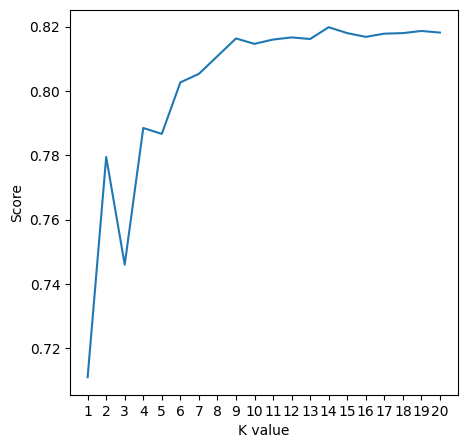

In [ ]:
plt.plot(range(1,21), new_scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

In [ ]:
new_KNAcc = max(new_scoreListknn)
print("K-Nearest Neighbour(KNN) Best Accuracy: {:.2f}%".format(new_KNAcc*100))

K-Nearest Neighbour(KNN) Best Accuracy: 81.98%


In [ ]:
new_best_k_index = new_scoreListknn.index(max(new_scoreListknn))  # Find the index of the maximum accuracy
new_best_k = new_best_k_index + 1  # Add 1 because index starts from 0 but k starts from 1

In [ ]:
# Retrain the KNN classifier with the optimal number of neighbors to get new_y_pred3
new_KNclassifier_max = KNeighborsClassifier(n_neighbors= new_best_k)
new_KNclassifier_max.fit(new_X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [ ]:
new_y_pred3 = new_KNclassifier_max.predict(new_X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
new_accuracy_knn = accuracy_score(y_test, new_y_pred3)
new_precision_knn = precision_score(y_test, new_y_pred3)
new_recall_knn = recall_score(y_test, new_y_pred3)
new_f1_knn = f1_score(y_test, new_y_pred3)

In [ ]:
print('K-Nearest Neighbour(KNN) Accuracy: {:.2f}%'.format(new_accuracy_knn * 100))
print('K-Nearest Neighbour(KNN) Precision: {:.2f}%'.format(new_precision_knn* 100))
print('K-Nearest Neighbour(KNN) Recall: {:.2f}%'.format(new_recall_knn* 100))
print('K-Nearest Neighbour(KNN) F1-Score: {:.2f}%'.format(new_f1_knn* 100))

K-Nearest Neighbour(KNN) Accuracy: 81.98%
K-Nearest Neighbour(KNN) Precision: 69.33%
K-Nearest Neighbour(KNN) Recall: 31.68%
K-Nearest Neighbour(KNN) F1-Score: 43.49%


## **6.5** Support Vector Machine (SVM) and Accuracy Score

In [ ]:
from sklearn.svm import SVC
new_SVCclassifier = SVC(kernel='rbf', max_iter=500)
new_SVCclassifier.fit(new_X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=500)

In [ ]:
new_y_pred4 = new_SVCclassifier.predict(new_X_test)

In [ ]:
from sklearn.metrics import accuracy_score
new_SVCAcc = accuracy_score(new_y_pred4,y_test)
print('Support Vector Machine (SVM) Accuracy: {:.2f}%'.format(new_SVCAcc*100))

Support Vector Machine (SVM) Accuracy: 46.63%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
new_accuracy_svc = accuracy_score(y_test, new_y_pred4)
new_precision_svc = precision_score(y_test, new_y_pred4)
new_recall_svc = recall_score(y_test, new_y_pred4)
new_f1_svc = f1_score(y_test, new_y_pred4)

In [ ]:
print('Support Vector Machine (SVM) Accuracy: {:.2f}%'.format(new_accuracy_svc * 100))
print('Support Vector Machine (SVM) Precision: {:.2f}%'.format(new_precision_svc* 100))
print('Support Vector Machine (SVM) Recall: {:.2f}%'.format(new_recall_svc* 100))
print('Support Vector Machine (SVM) F1-Score: {:.2f}%'.format(new_f1_svc* 100))

Support Vector Machine (SVM) Accuracy: 46.63%
Support Vector Machine (SVM) Precision: 12.89%
Support Vector Machine (SVM) Recall: 24.98%
Support Vector Machine (SVM) F1-Score: 17.00%


<Axes: >

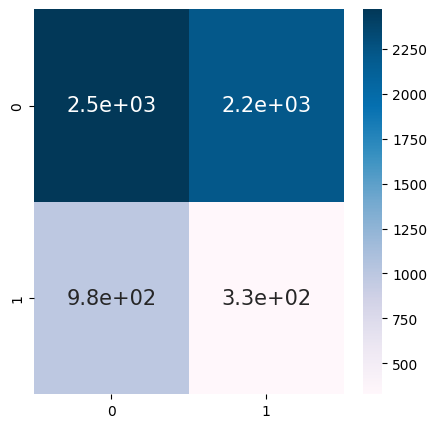

In [ ]:
# Cofusion Matrix
new_y_pred4 = new_SVCclassifier.predict(new_X_test)
cm = confusion_matrix(y_test, new_y_pred4)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

## **6.6** Random Forest and Accuracy Score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
new_scoreListRF = []
for i in range(2,25):
    new_RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    new_RFclassifier.fit(new_X_train, y_train)
    new_scoreListRF.append(new_RFclassifier.score(new_X_test, y_test))

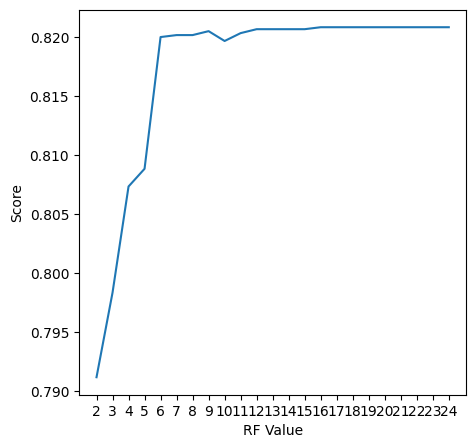

In [ ]:
plt.plot(range(2,25), new_scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()

In [ ]:
new_RFAcc = max(new_scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(new_RFAcc*100))

Random Forest Accuracy:  82.08%


In [ ]:
# Find the index of the maximum accuracy score
new_best_leaf_nodes_index = new_scoreListRF.index(max(new_scoreListRF))
# Add 2 because the loop starts from 2
new_best_max_leaf_nodes = new_best_leaf_nodes_index + 2

In [ ]:
# Retrain the Random Forest classifier with the optimal max_leaf_nodes to get y_pred5
new_RFclassifier_max = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes= new_best_max_leaf_nodes)
new_RFclassifier_max.fit(new_X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=1000, random_state=1)

In [ ]:
new_y_pred5 = new_RFclassifier_max.predict(new_X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
new_accuracy_rf = accuracy_score(y_test, new_y_pred5)
new_precision_rf = precision_score(y_test, new_y_pred5)
new_recall_rf = recall_score(y_test, new_y_pred5)
new_f1_rf = f1_score(y_test, new_y_pred5)

In [ ]:
print('Random Forest Accuracy: {:.2f}%'.format(new_accuracy_rf * 100))
print('Random Forest Precision: {:.2f}%'.format(new_precision_rf* 100))
print('Random Forest Recall: {:.2f}%'.format(new_recall_rf* 100))
print('Random Forest F1-Score: {:.2f}%'.format(new_f1_rf* 100))

Random Forest Accuracy: 82.08%
Random Forest Precision: 69.26%
Random Forest Recall: 32.60%
Random Forest F1-Score: 44.33%


<Axes: >

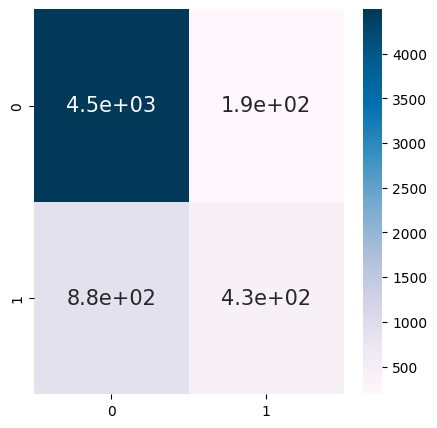

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_test, new_y_pred5)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

## **6.7** Naïve Bayes and Accuracy Score

### **6.7.1** Gaussian Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
new_GNBclassifier = GaussianNB()
new_GNBclassifier.fit(new_X_train, y_train)

GaussianNB()

In [ ]:
new_y_pred6 = new_GNBclassifier.predict(new_X_test)

In [ ]:
from sklearn.metrics import accuracy_score
new_GNBAcc = accuracy_score(new_y_pred6,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(new_GNBAcc*100))

Gaussian Naive Bayes accuracy: 79.72%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
new_accuracy_gnb = accuracy_score(y_test, new_y_pred6)
new_precision_gnb = precision_score(y_test, new_y_pred6)
new_recall_gnb = recall_score(y_test, new_y_pred6)
new_f1_gnb = f1_score(y_test, new_y_pred6)

In [ ]:
print('Gaussian Naïve Bayes Accuracy: {:.2f}%'.format(new_accuracy_gnb * 100))
print('Gaussian Naïve Bayes Precision: {:.2f}%'.format(new_precision_gnb* 100))
print('Gaussian Naïve Bayes Recall: {:.2f}%'.format(new_recall_gnb* 100))
print('Gaussian Naïve Bayes F1-Score: {:.2f}%'.format(new_f1_gnb* 100))

Gaussian Naïve Bayes Accuracy: 79.72%
Gaussian Naïve Bayes Precision: 54.28%
Gaussian Naïve Bayes Recall: 46.38%
Gaussian Naïve Bayes F1-Score: 50.02%


### **6.7.2** Bernoulli Naïve Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
new_BNBclassifier = BernoulliNB()
new_BNBclassifier.fit(new_X_train, y_train)

BernoulliNB()

In [ ]:
new_y_pred7 = new_BNBclassifier.predict(new_X_test)

In [ ]:
from sklearn.metrics import accuracy_score
new_BNBAcc = accuracy_score(new_y_pred7,y_test)
print('Bernoulli Naive Bayes accuracy: {:.2f}%'.format(new_BNBAcc*100))

Bernoulli Naive Bayes accuracy: 81.33%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
new_accuracy_bnb = accuracy_score(y_test, new_y_pred7)
new_precision_bnb = precision_score(y_test, new_y_pred7)
new_recall_bnb = recall_score(y_test, new_y_pred7)
new_f1_bnb = f1_score(y_test, new_y_pred7)

In [ ]:
print('Bernoulli Naïve Bayes Accuracy: {:.2f}%'.format(new_accuracy_bnb * 100))
print('Bernoulli Naïve Bayes Precision: {:.2f}%'.format(new_precision_bnb* 100))
print('Bernoulli Naïve Bayes Recall: {:.2f}%'.format(new_recall_bnb* 100))
print('Bernoulli Naïve Bayes F1-Score: {:.2f}%'.format(new_f1_bnb* 100))

Bernoulli Naïve Bayes Accuracy: 81.33%
Bernoulli Naïve Bayes Precision: 61.37%
Bernoulli Naïve Bayes Recall: 39.68%
Bernoulli Naïve Bayes F1-Score: 48.20%


## **6.8** Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(new_X_train.shape[1],)),
    layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary of the model architecture
model.summary()

# Train the model
history = model.fit(new_X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
new_test_loss, new_test_acc = model.evaluate(new_X_test, y_test)
print(f'\nTest accuracy: {new_test_acc}, Test loss: {new_test_loss}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.4760 - accuracy: 0.8026 - val_loss: 0.4532 - val_accuracy: 0.8150
Epoch 2/10

## **6.8** Model Comparison

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour (KNN)',
                                  'Support Vector Machine (SVM)', 'Decision Tree',
                                  'Random Forest', 'Gaussian Naïve Bayes',
                                   'Bernoulli Naïve Bayes','Neural Network'],
                        'Accuracy(%)': [new_accuracy_lr * 100, new_accuracy_knn * 100,
                                     new_accuracy_svc * 100, new_accuracy_dt * 100,
                                     new_accuracy_rf * 100, new_accuracy_gnb * 100,
                                      new_accuracy_bnb * 100, new_test_acc * 100]})
compare.sort_values(by='Accuracy(%)', ascending=False)

,Model,Accuracy(%)
4,Random Forest,82.083333
7,Neural Network,82.083333
1,K-Nearest Neighbour (KNN),81.983333
0,Logistic Regression,81.916667
3,Decision Tree,81.783333
6,Bernoulli Naïve Bayes,81.333333
5,Gaussian Naïve Bayes,79.716667
2,Support Vector Machine (SVM),46.633333
